In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "../src")

We finally have a calibration box on a table, let's take a look at it.

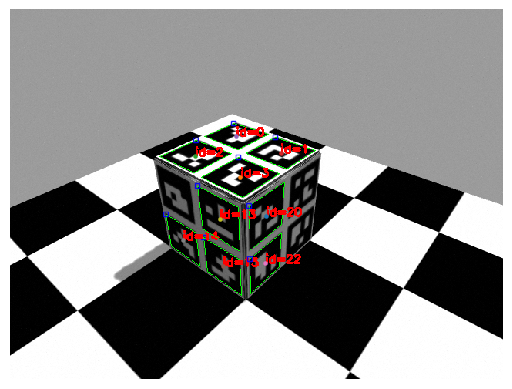

In [47]:
import cv2 as cv
import matplotlib.pyplot as plt
import tempfile
from pathlib import Path
import numpy as np

from camera import (
    move_camera_pos,
    get_camera_image_rgb,
    get_camera_image_depth,
    draw_aruco_grid,
    extract_aruco_tags,
    draw_aruco_tags,
)
import rospy

rospy.init_node("camera_test")
move_camera_pos(-0.4, -0.4, 1, pitch=0.6, yaw=0.7)
rgb = get_camera_image_rgb()
frame_markers, corners, ids = extract_aruco_tags(rgb)
draw_aruco_tags(frame_markers, corners, ids)
plt.show()

This is a photogenic angle, so let's keep that.

In generally, I want to get a sense of which sides map to which faces.
Then, we can take one of the faces and get the relative distances of each of the centers.

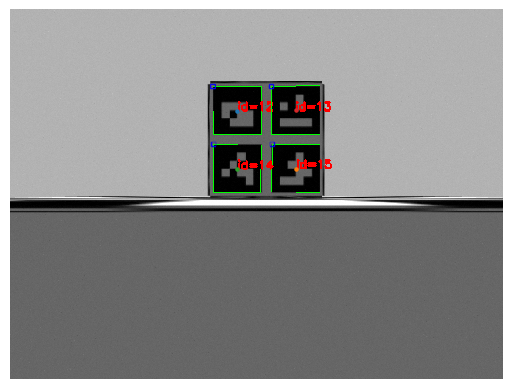

[12, 15, 14, 13]
[3 3 3 3]


In [48]:
def plot_and_list(*args, **kwargs):
    move_camera_pos(*args, **kwargs)
    rgb = get_camera_image_rgb()
    frame_markers, corners, ids = extract_aruco_tags(rgb)
    draw_aruco_tags(frame_markers, corners, ids)
    plt.show()
    x = ids.reshape(-1)
    print(x.tolist())
    print(x // 4)


plot_and_list(-0.75, 0, 0.5)

Above, we're looking at the "front" of the box, which corresponds to face 3.

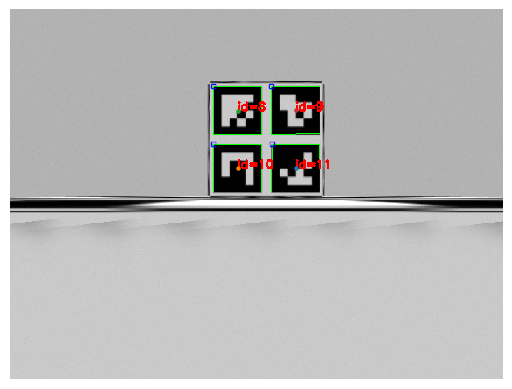

[11, 10, 8, 9]
[2 2 2 2]


In [57]:
plot_and_list(0.75, 0, 0.5, yaw=np.pi)

This is face 2, which is the "back" side of the box.

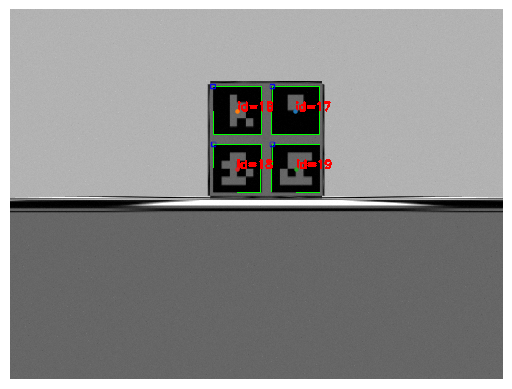

[17, 16, 19, 18]
[4 4 4 4]


In [53]:
plot_and_list(0, 0.75, 0.5, yaw=np.pi / 2 * 3)

This is face 4, which is the "left" side of the box.
We can imagine going clockwise from the front.

This means that the right side of the box will be face 5.

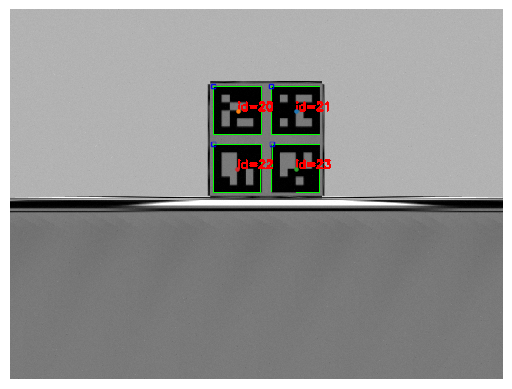

[21, 20, 23, 22]
[5 5 5 5]


In [54]:
plot_and_list(0, -0.75, 0.5, yaw=np.pi / 2)

Finally, we take a look at the top of the box,, which should be face 0.

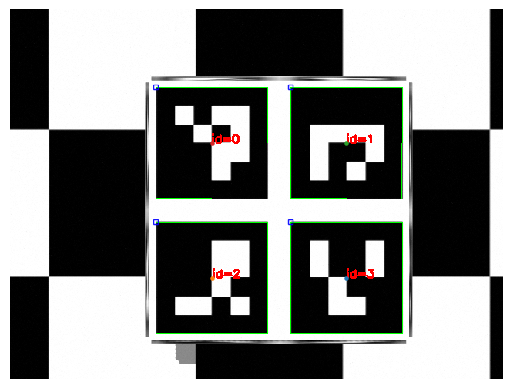

[3, 2, 1, 0]
[0 0 0 0]


In [58]:
plot_and_list(0, 0, 1, pitch=np.pi / 2)